In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../Students_performance_in_exams/data/exams.csv')
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int']).columns.tolist()

In [15]:
# set plot background
sns.set_style("whitegrid")

In [13]:
# bar chart
def bar_chart_count(df:pd.DataFrame, categorical_columns:list, height:float = 5.0, aspect:float = 1.5):
    """ Plots a bar chart with size distribution of categorical variable.

    Args:
        df (pd.DataFrame): DataFrame.
        categorical_columns (list): list of categorical columns from df.
        height (float, optional): height of the plot. Defaults to 5.0.
        aspect (float, optional): sets plot's height to plot's width ratio. Defaults to 1.5.
    """    
    for col in categorical_columns:
        sns.catplot(data = df, x = col, kind = 'count', height=height, aspect=aspect);

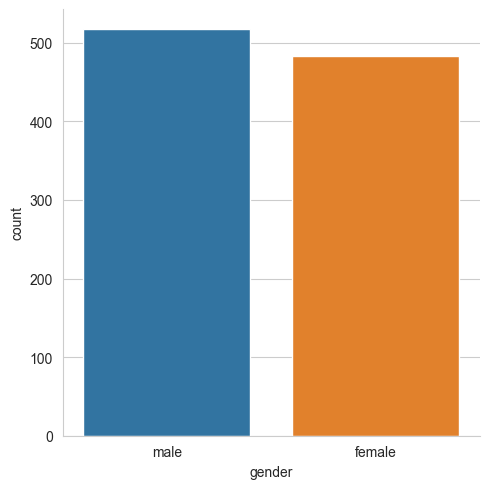

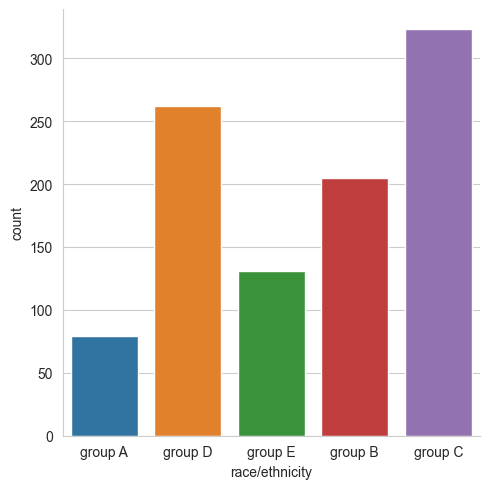

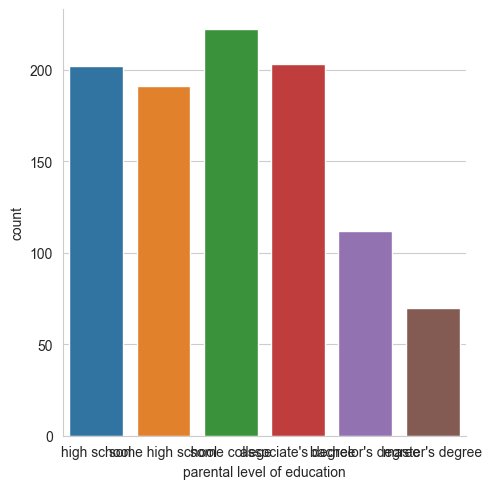

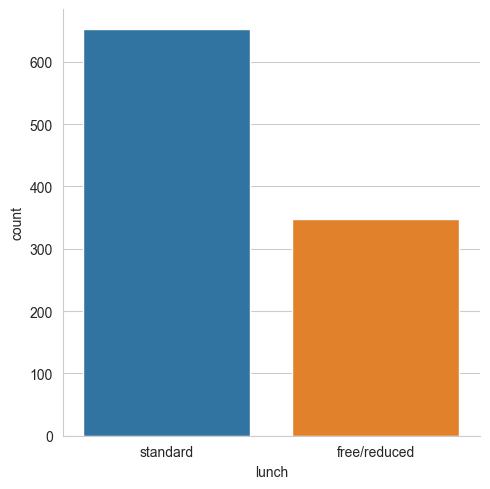

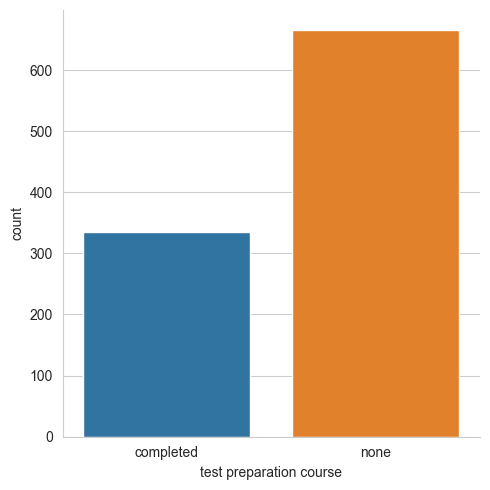

In [24]:
bar_chart_count(df, categorical_columns, aspect=1)

In [29]:
def pie_chart_pct(df:pd.DataFrame, categorical_columns:list, figsize:tuple = (5,5)):
    """ Plots a pie chart. Counts values and returns a plot with pct distribution.

    Args:
        df (pd.DataFrame): DataFrame.
        categorical_columns (list): list of categorical columns from df.
        figsize (tuple, optional): size of the plot. Defaults to (5,5).
    """     
    for col in categorical_columns:
        labels = df[col].value_counts().index
        sizes = df[col].value_counts()

        fig1, ax1 = plt.subplots(figsize=figsize)
        fig1
        title = plt.title(col);
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
                shadow=False, startangle=90)
        
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.show()

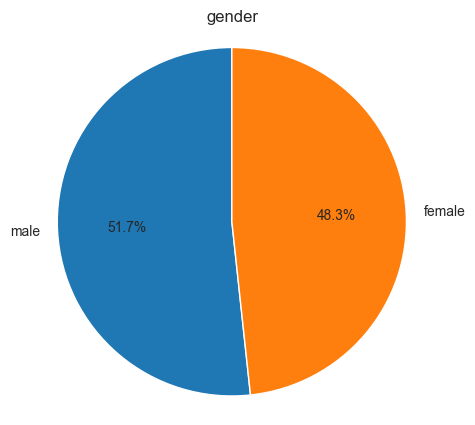

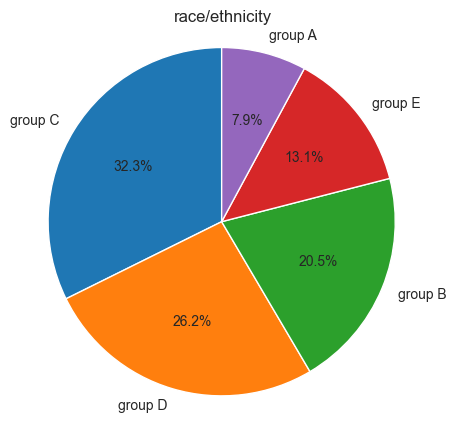

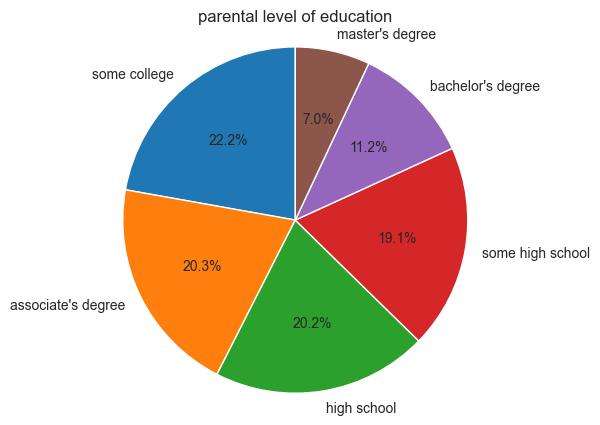

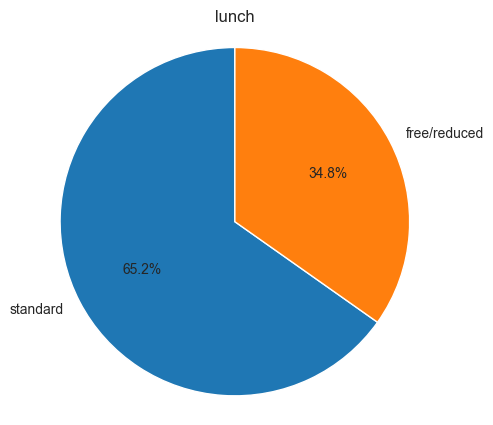

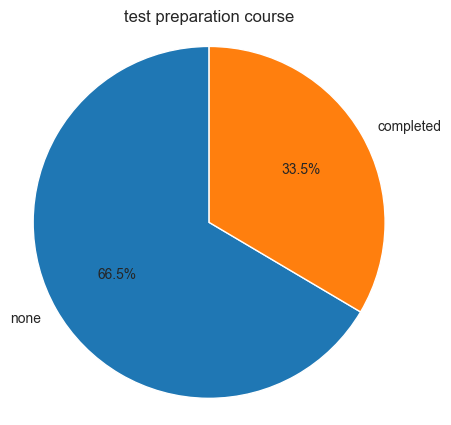

In [32]:
pie_chart_pct(df, categorical_columns)

In [33]:
# box plot
def box_plot(df:pd.DataFrame, numerical_columns:list):
    """ Plots a general box plot.

    Args:
        df (pd.DataFrame): DataFrame.
        numerical_columns (list): list of numerical columns from df.
    """    
    for num_col in numerical_columns:
        sns.catplot(data=df, y=num_col, kind='box');

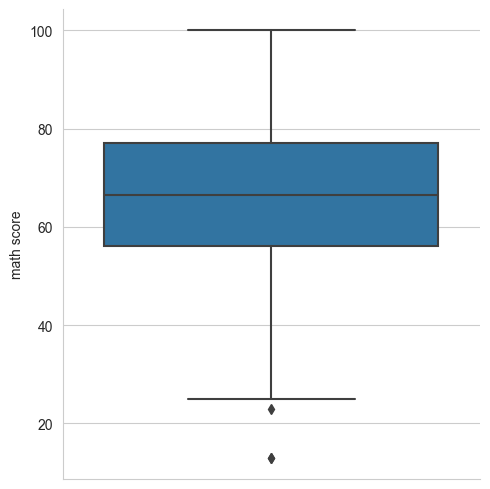

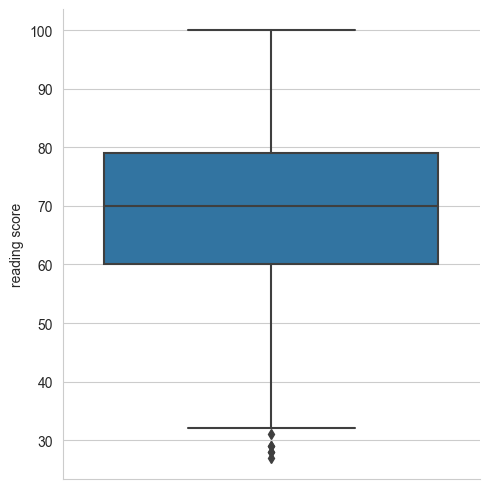

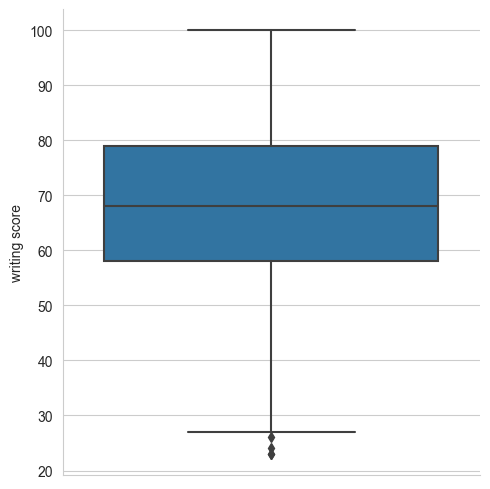

In [34]:
box_plot(df, numerical_columns)

In [35]:
def box_plot_per_category_value(df:pd.DataFrame, numerical_columns:list, categorical_columns:list, height:float = 5.0):
    """ Plots box plot for many numerical and categorical variables.

    Args:
        df (pd.DataFrame): DataFrame.
        numerical_columns (list): list of numerical columns from df.
        categorical_columns (list): list of categorical columns from df.
        height (float, optional): height of the plot. Defaults to 5.0.
    """    
    for num_col in numerical_columns:
        for cat_col in categorical_columns:
            sns.catplot(data=df, y=num_col, col = cat_col, kind='box',height=5);

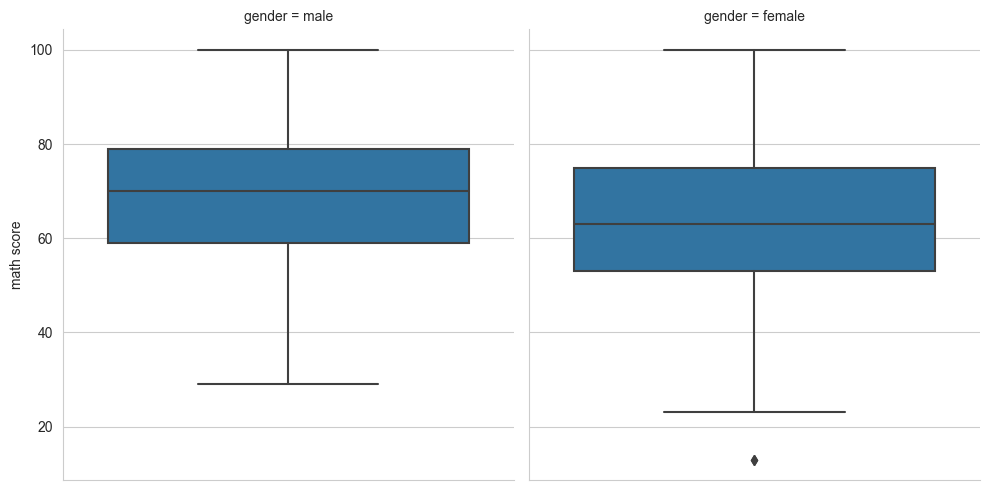

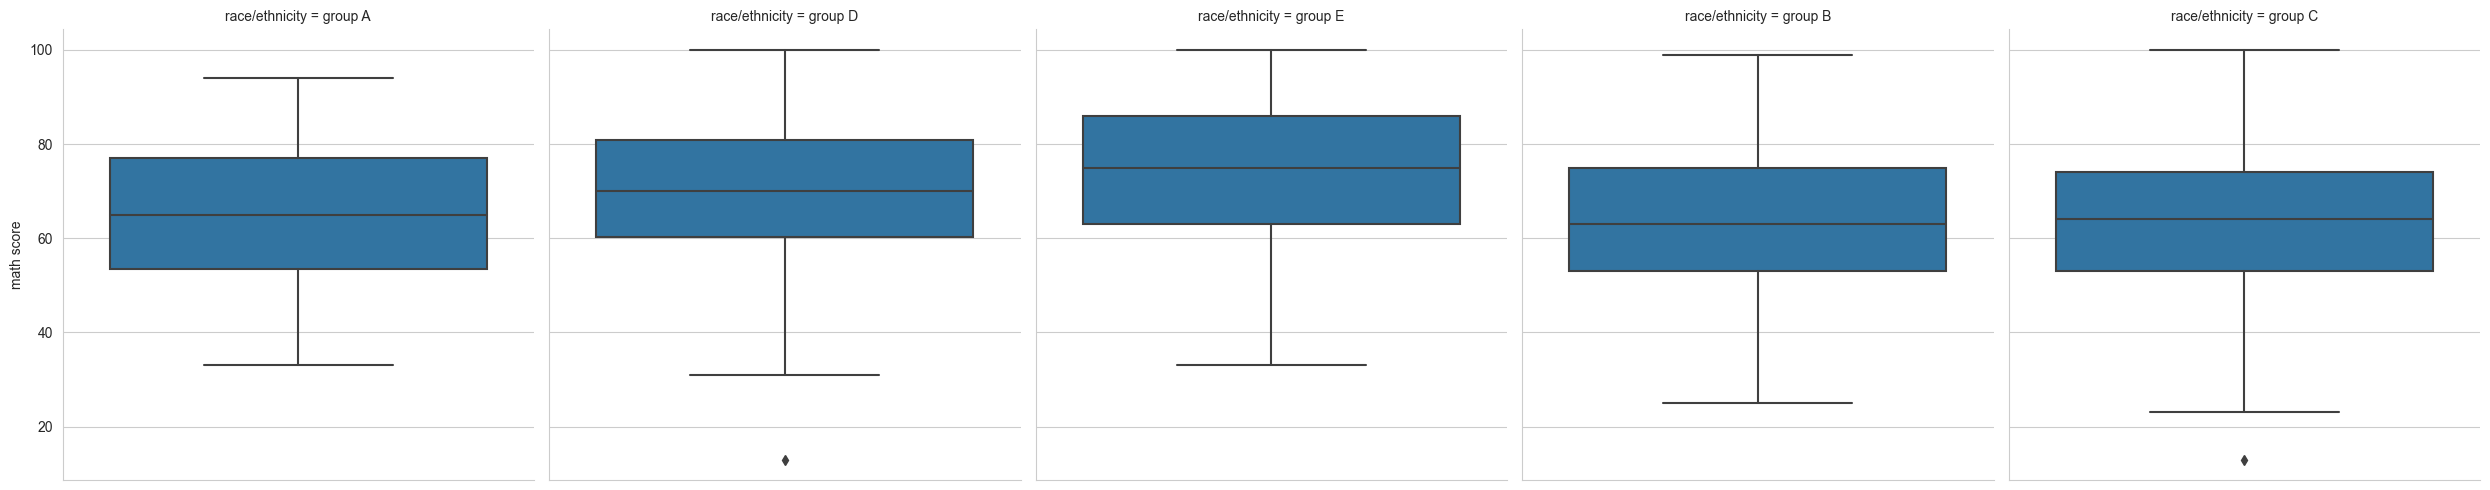

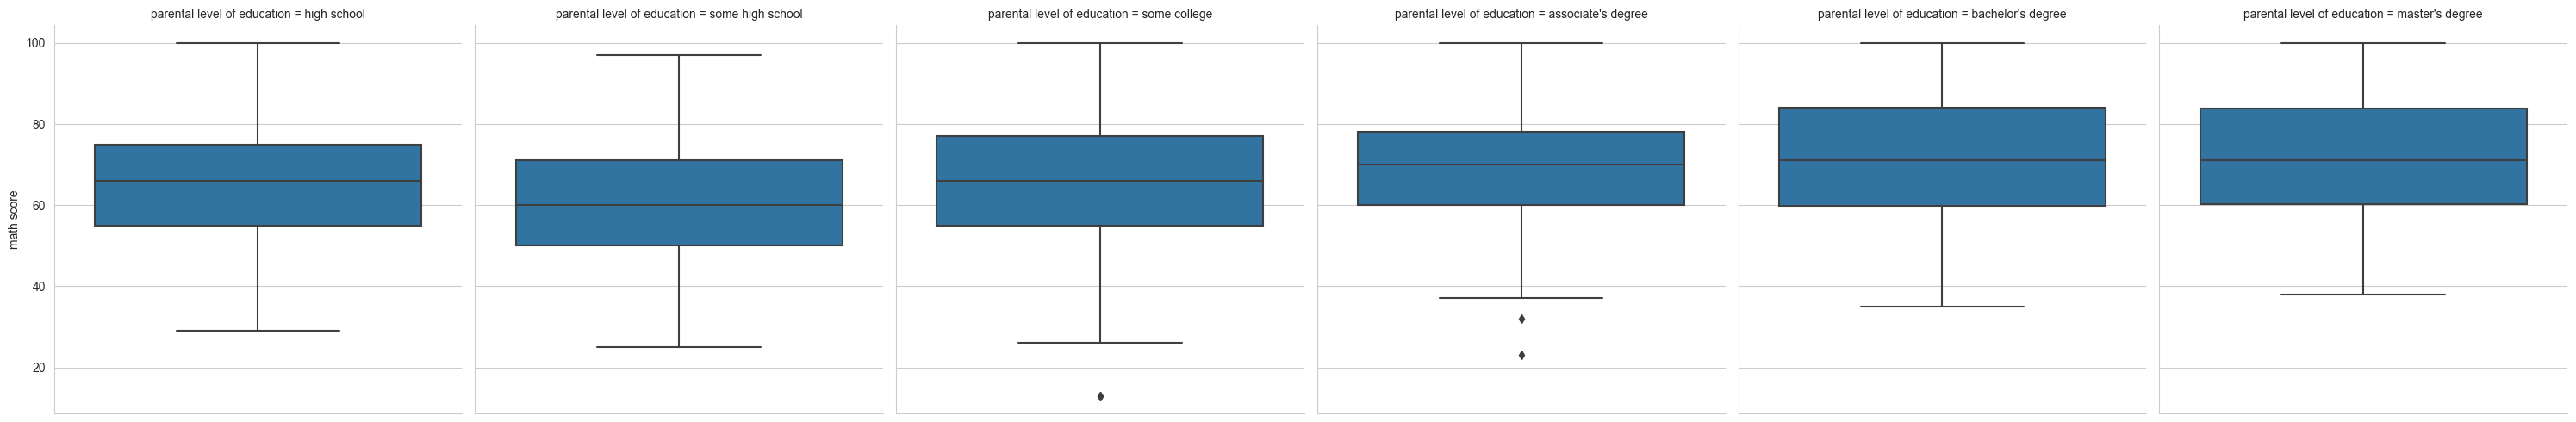

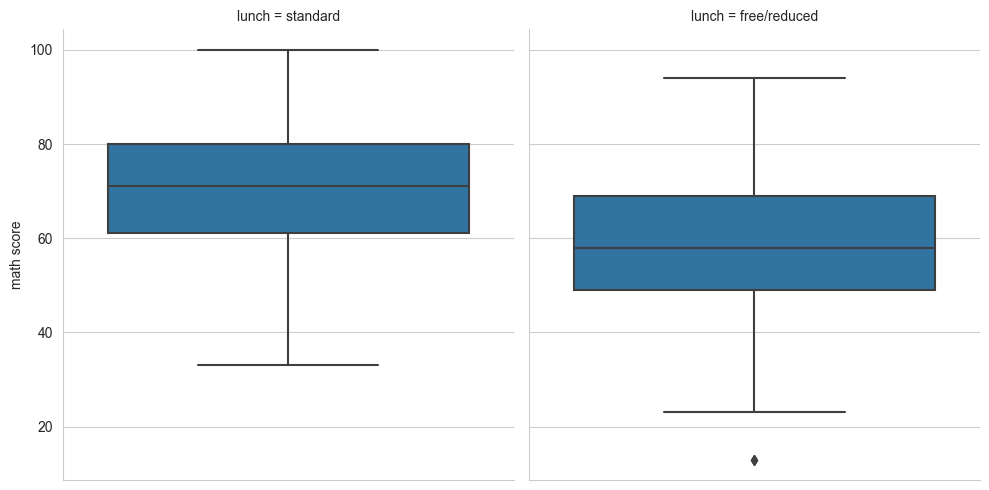

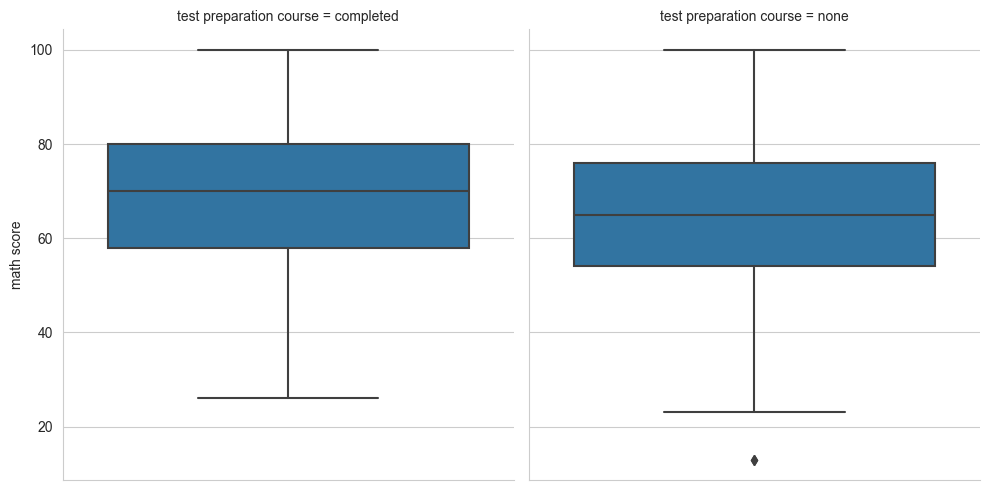

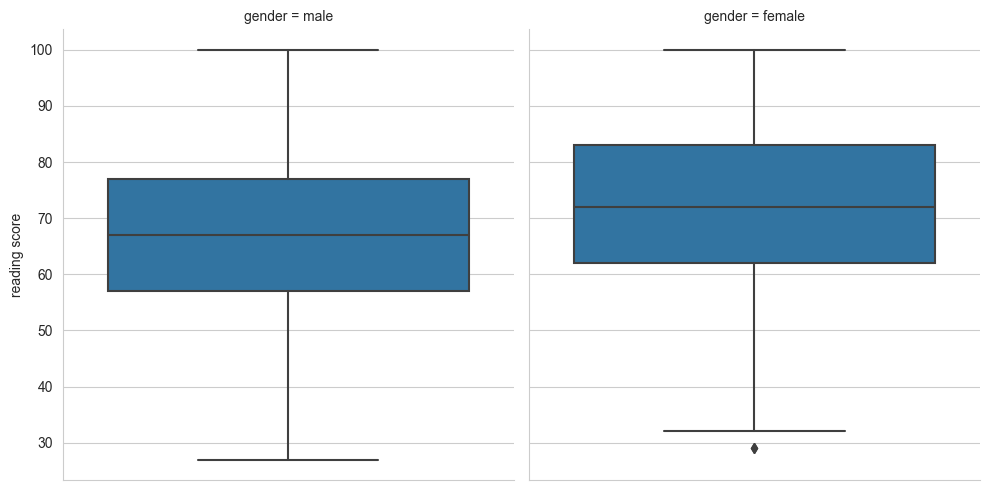

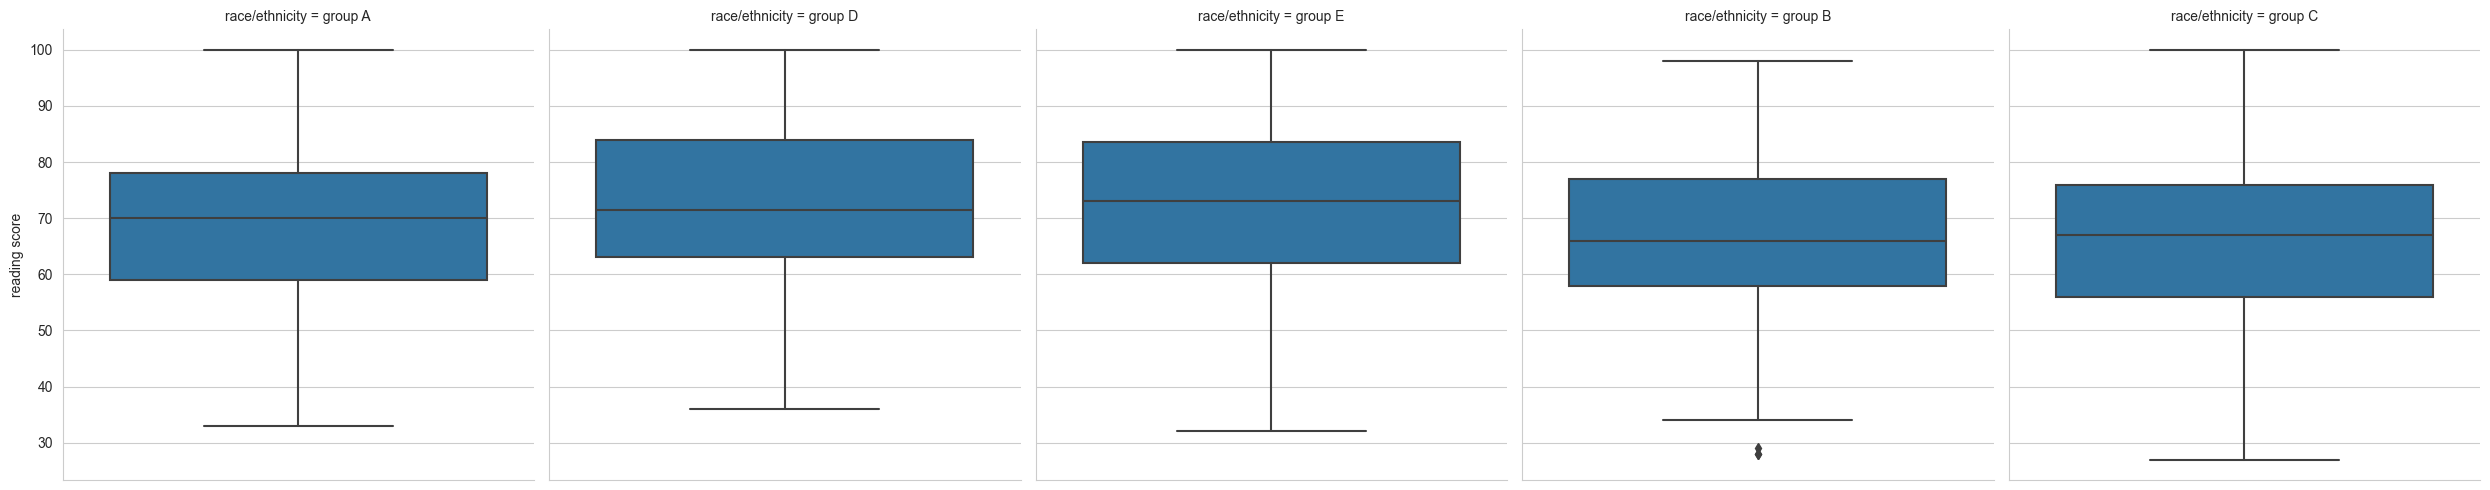

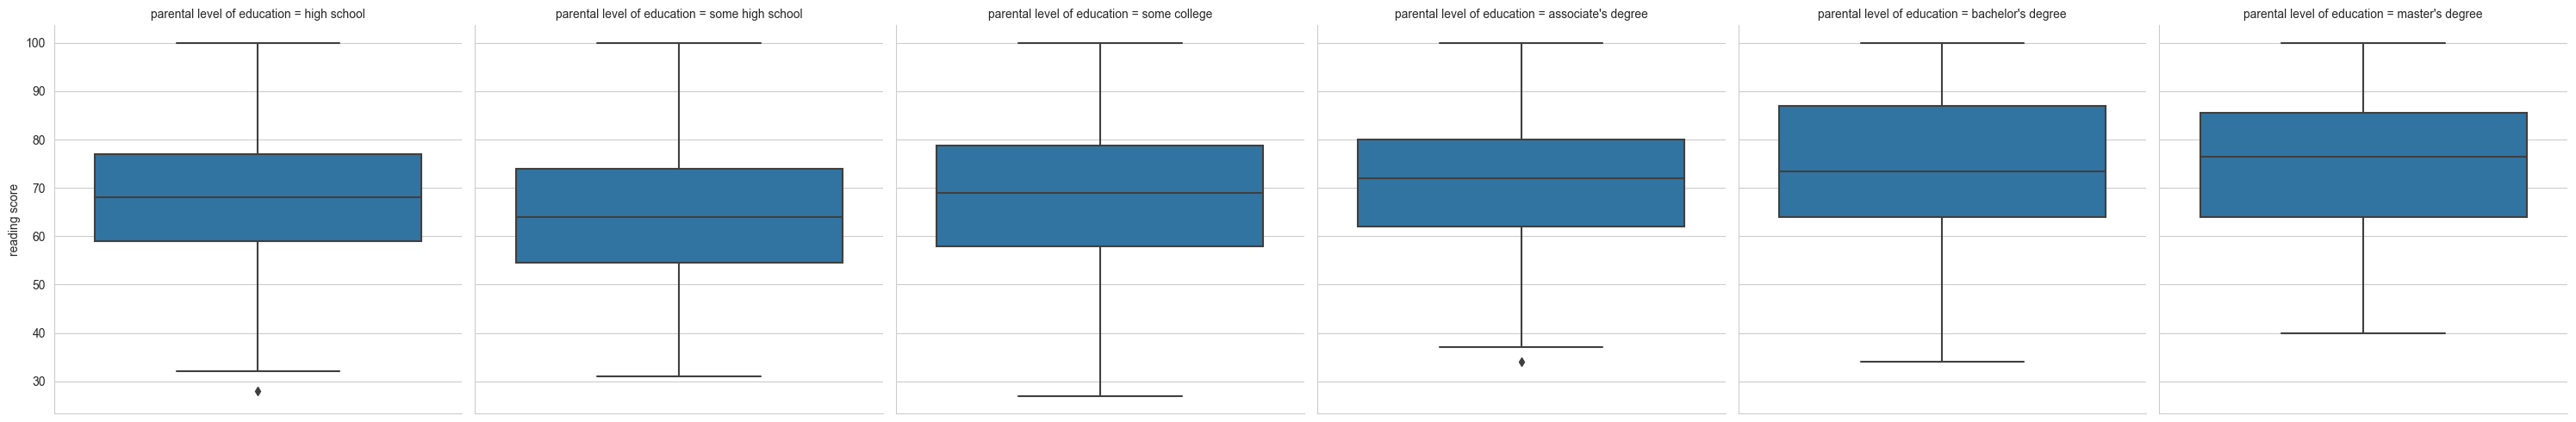

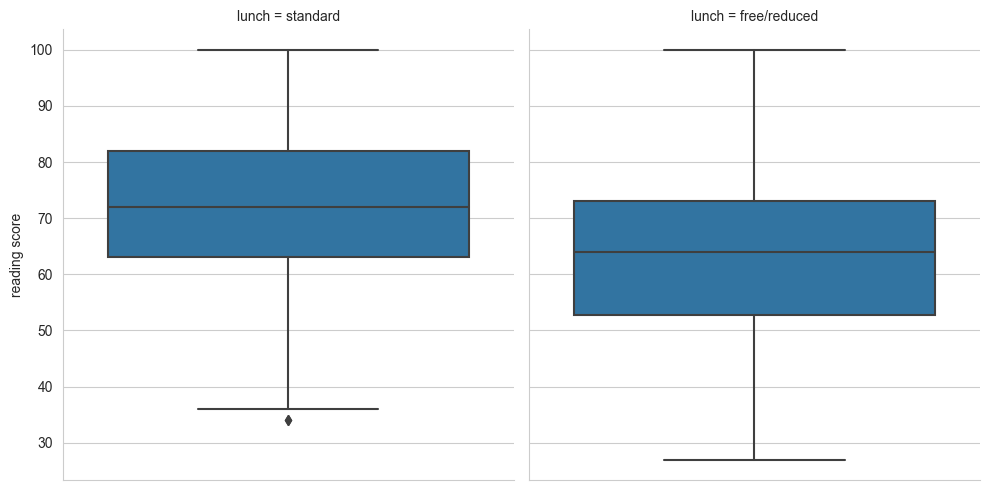

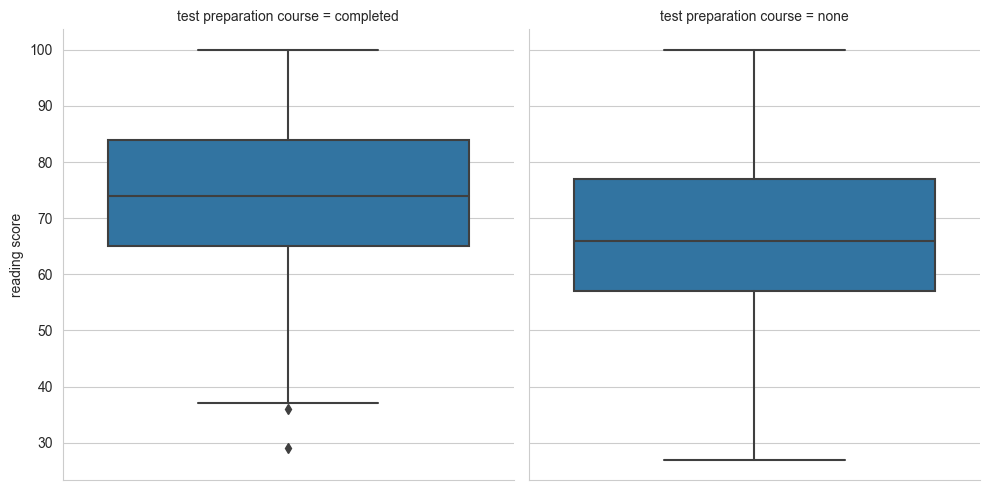

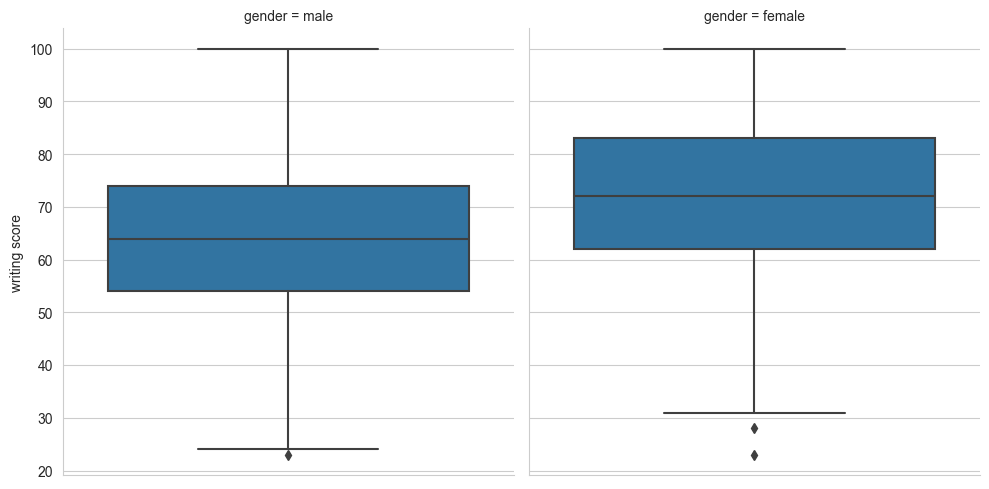

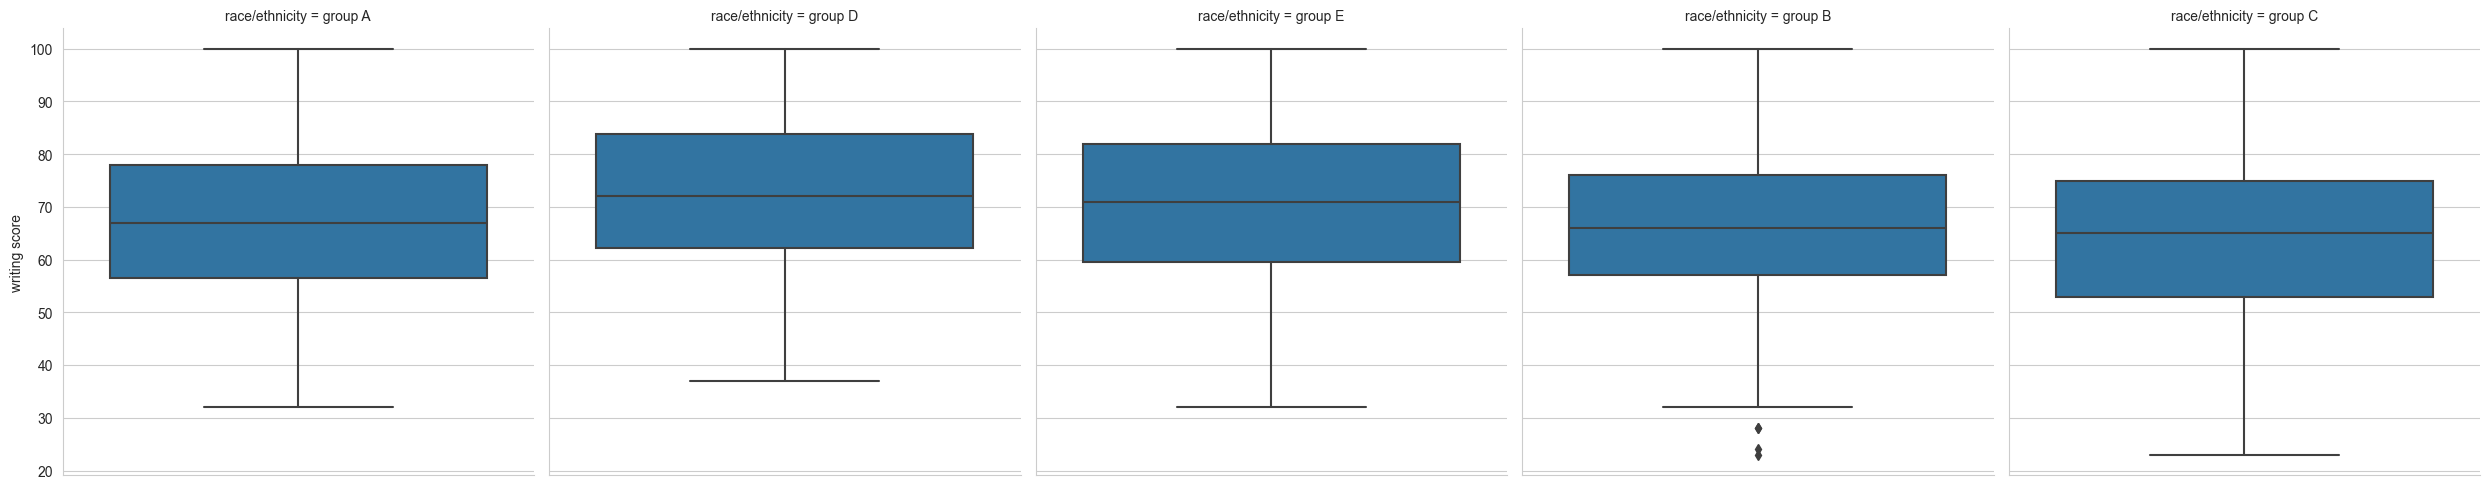

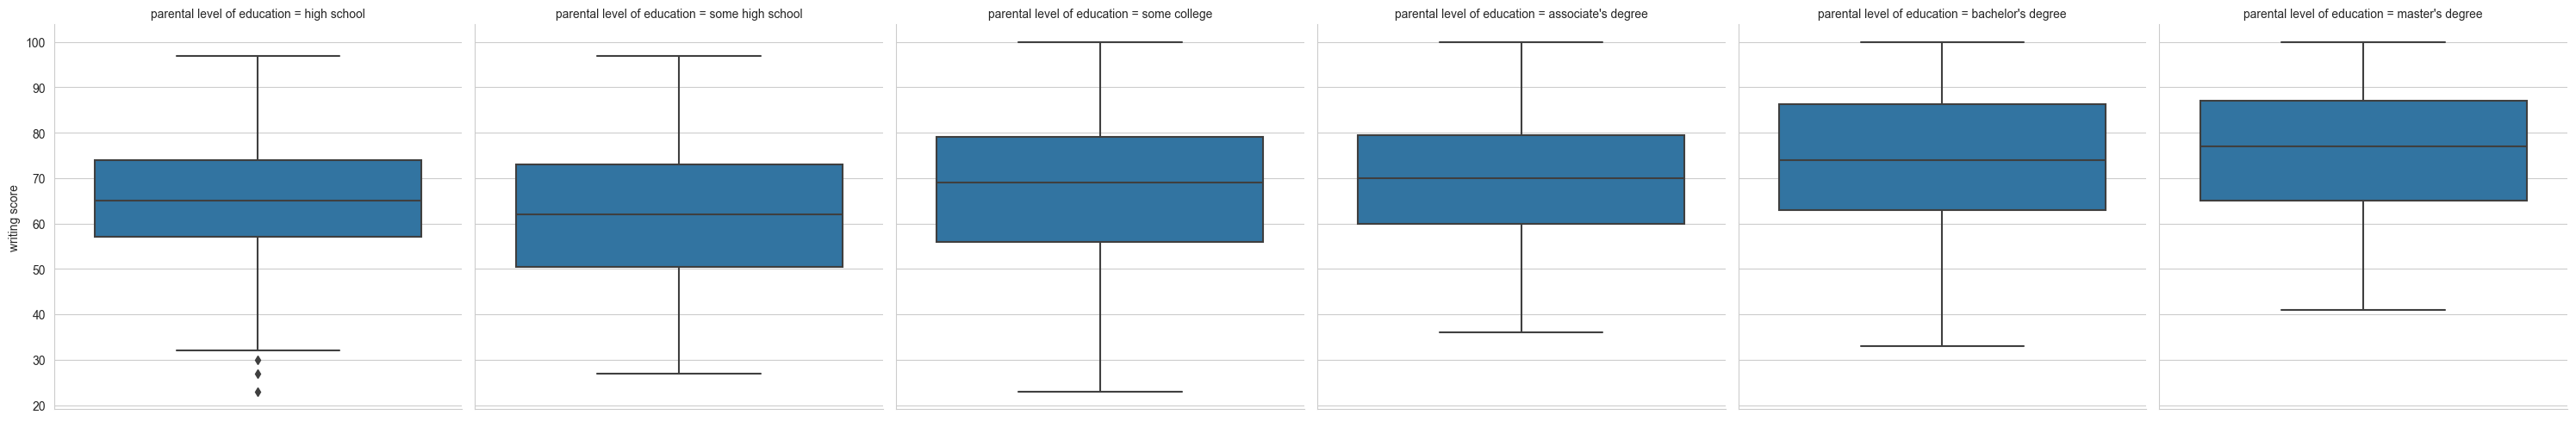

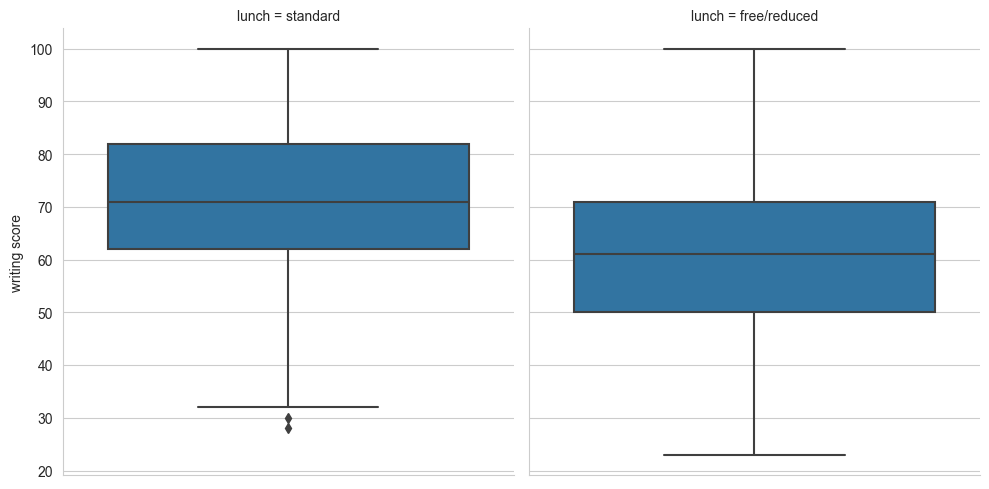

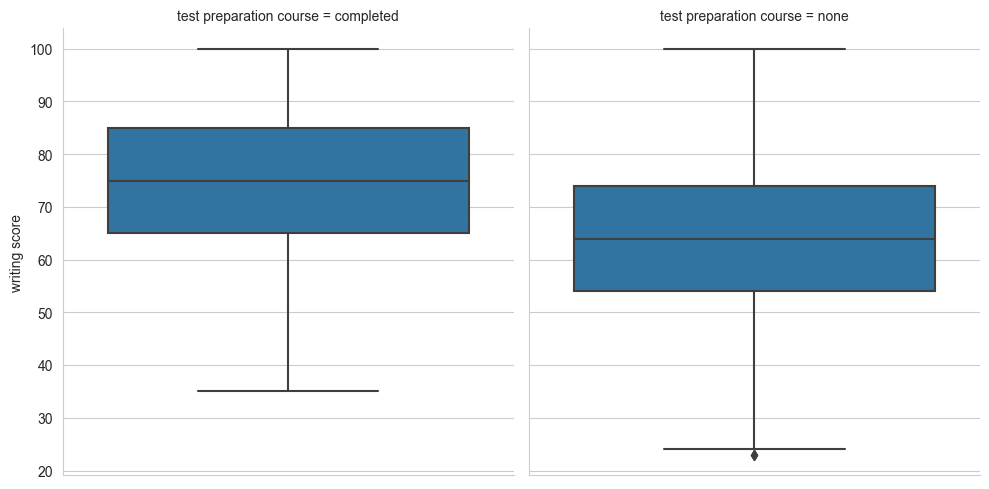

In [37]:
box_plot_per_category_value(df, numerical_columns,categorical_columns)

In [38]:
def histogram(df: pd.DataFrame, numerical_columns: list, n_bin: int = 6, figsize:tuple = (5,5)):
    """ Plots a histogram.

    Args:
        df (pd.DataFrame): DataFrame.
        numerical_columns (list): list of numerical columns from df.
        n_bin (int, optional): number of bins. Defaults to 6.
        figsize (tuple, optional): size of the plot. Defaults (5,5).
    """    
    for col in numerical_columns:
        plt.figure(figsize = figsize)
        plt.hist(df[col], bins = n_bin)
        plt.title(col)

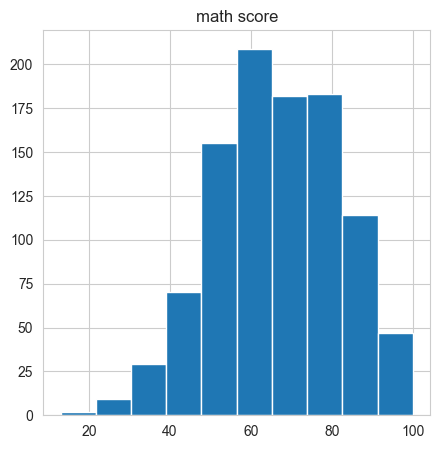

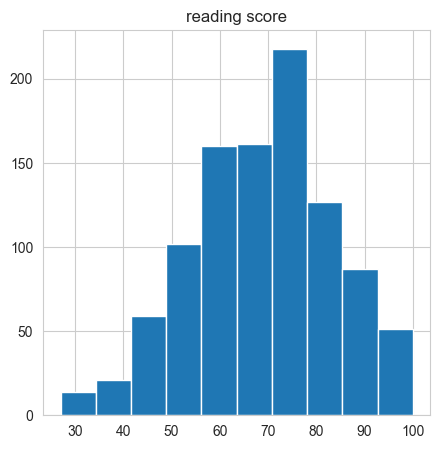

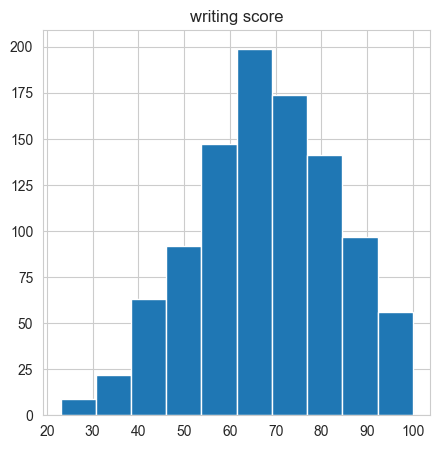

In [39]:
histogram(df, numerical_columns, n_bin= 10)

In [68]:
def scatter_pairplot(df:pd.DataFrame, numerical_columns:list, n_color_pallete:int = 1, color_palette_type:str = 'hls', hue:str = None):
    """ plots scatterplots. May color points depending on hue variable.

    Args:
        df (pd.DataFrame): DataFrame
        numerical_columns (list): list of numerical columns from df.
        n_color_pallete (int): number of colors in sns.color_palette. For more details check https://seaborn.pydata.org/generated/seaborn.color_palette.html
        color_palette_type (str, optional): Choice of color palette. Defaults to 'hls'. For more details check https://seaborn.pydata.org/generated/seaborn.color_palette.html
        hue (str): gives an option to color points depending on a variable.

    """
    if hue == None:
        sns.pairplot(df, vars=numerical_columns, palette=sns.color_palette(color_palette_type, n_color_pallete))
    else:
        sns.pairplot(df, vars=numerical_columns, hue = hue, palette=sns.color_palette(color_palette_type, n_color_pallete))

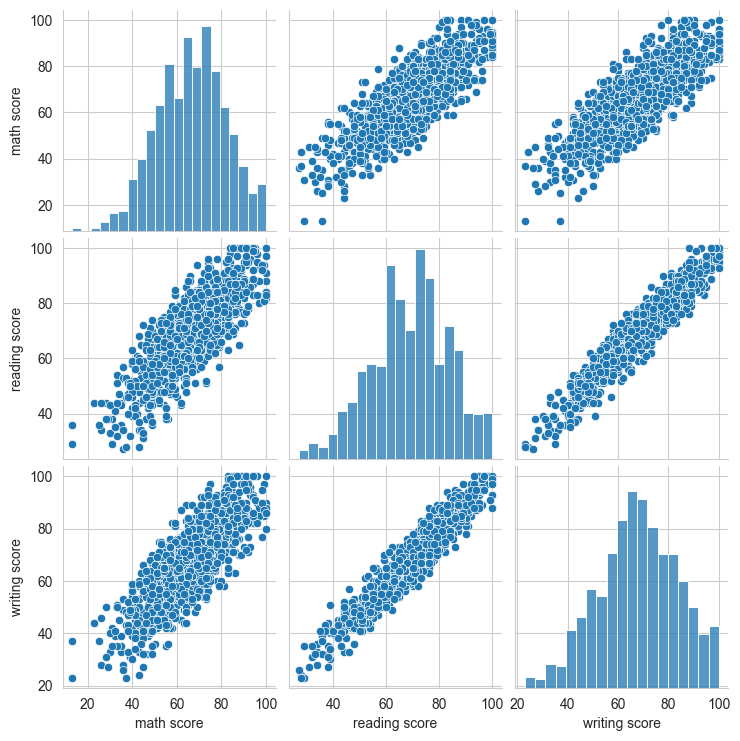

In [69]:
scatter_pairplot(df, numerical_columns)

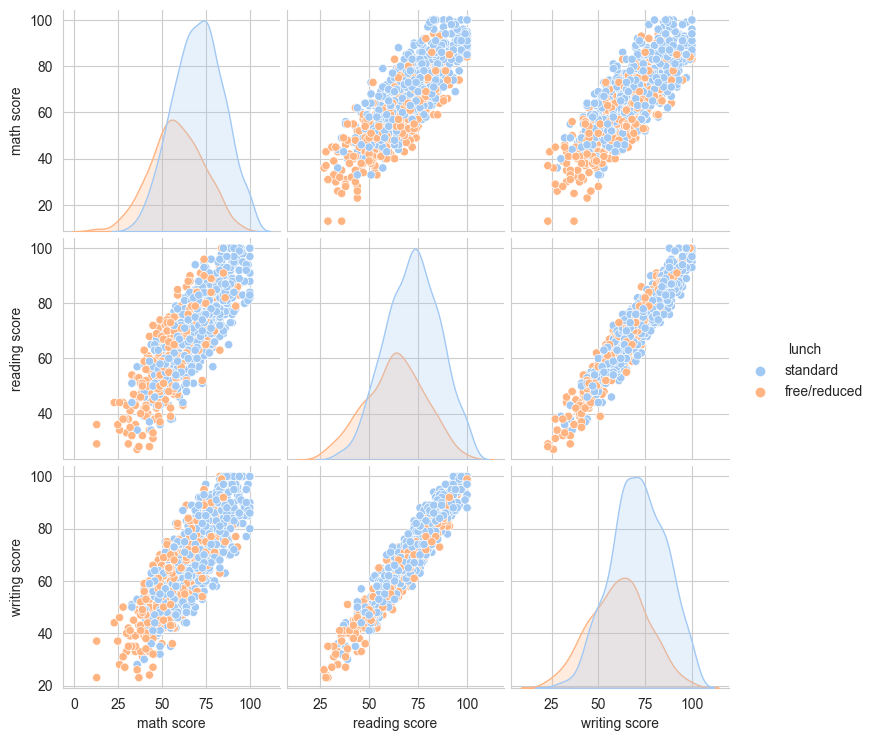

In [70]:
scatter_pairplot(df, numerical_columns, 2, 'pastel', 'lunch')